# MNIST Fashion - TF

## Imports

In [1]:
import numpy as np
import time
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.fashion_mnist # 28x28 Fashion Image Data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]


## Preprocess the data

In [3]:
# load the data into train/test split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize( x_train, axis=1 )
x_test = tf.keras.utils.normalize( x_test, axis=1 )

In [4]:
# save the image shape
# 28 by 28 pixels = 784 pixels
input_shape = x_train[0].shape
print("Shape = ", input_shape )

total_size = input_shape[0] * input_shape[1]
print("TOTAL SIZE = ", total_size)


Shape =  (28, 28)
TOTAL SIZE =  784


## Preview of an image

In [5]:
def getRandomIndex( DATA ) :
    return random.randint(0, DATA.shape[0] )

who = 7838
classed as = Trouser


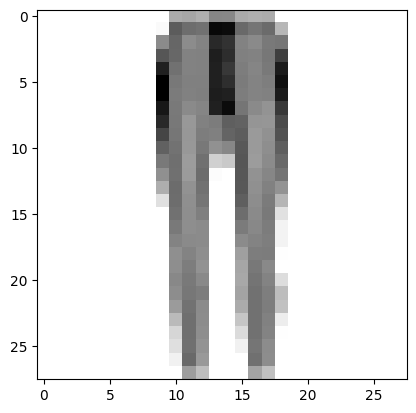

In [6]:
who=0
who=getRandomIndex( x_train )

print("who =", who)

print("classed as =", class_names[y_train[who]])
#print( x_train[who])
plt.imshow(x_train[who], plt.cm.binary) 
#plt.imshow(x_train[who] ) 


## Random Forest

### Flatten the data

In [7]:
new_x_train = []
for i in x_train :
    new_x_train.append( i.flatten() )
new_x_train = np.array( new_x_train )

new_x_test = []
for i in x_test :
    new_x_test.append( i.flatten() )
new_x_test = np.array( new_x_test )

print( x_train.shape )
print( new_x_train.shape )

(60000, 28, 28)
(60000, 784)


### Fit the data

In [8]:
start_time = time.time()

theTrees = int( 2*total_size )

clf = RandomForestClassifier( n_estimators = theTrees )
clf.fit( new_x_train, y_train )

Time_In_Seconds = round( time.time()-start_time, 0 )
Time_In_Minutes = round( Time_In_Seconds / 60, 1 )
print("Execution Time In Seconds = ", Time_In_Seconds )
print("Execution Time In Minutes = ", Time_In_Minutes )


Execution Time In Seconds =  2649.0
Execution Time In Minutes =  44.1


In [9]:
pred_train = clf.predict( new_x_train )
print( pred_train[0] )
RF_acc_train = metrics.accuracy_score(y_train, pred_train )
print( "train accuracy", RF_acc_train )

pred_test = clf.predict( new_x_test )
print( pred_test[0] )
RF_acc = metrics.accuracy_score(y_test, pred_test )
print( "test accuracy", RF_acc )


9
train accuracy 1.0
9
test accuracy 0.8799


## Log Model Attempt

In [10]:
logmodel = LogisticRegression()
logmodel.fit( new_x_train, y_train )

c:\Users\TK\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
log_pred_train = logmodel.predict( new_x_train )
print( log_pred_train[0] )
log_acc_train = metrics.accuracy_score(y_train, log_pred_train )
print( "train accuracy", log_acc_train )

log_pred_test = logmodel.predict( new_x_test )
print( pred_test[0] )
log_acc = metrics.accuracy_score(y_test, log_pred_test )
print( "test accuracy", log_acc )


9
train accuracy 0.8721333333333333
9
test accuracy 0.8528


## Neural Network

In [12]:
theEpochs = 2

theActivation = tf.keras.activations.relu


units_01 = int( 2*total_size )
units_02 = units_01

DENSE_LAYER_01 = tf.keras.layers.Dense( units=units_01, activation=theActivation )
DENSE_LAYER_02 = tf.keras.layers.Dense( units=units_02, activation=theActivation )
DENSE_LAYER_XX = tf.keras.layers.Dense(10, activation=tf.nn.softmax )

DROPOUT_LAYER = tf.keras.layers.Dropout( 0.2 )


theOptimizer = tf.keras.optimizers.Adam()
theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()

theSplit = 0.2
theBatchSize = 32
verboseFlag = True

theTensorFlowSaveFile = "TF_Number_Model"

In [13]:

# Build the Model

print("This might take a while ... maybe 15+ minutes ...depends on your computer.")
start_time = time.time()

nn_model = tf.keras.models.Sequential()
nn_model.add( tf.keras.layers.Flatten( input_shape=input_shape ) )
nn_model.add( DENSE_LAYER_01 )
nn_model.add( DROPOUT_LAYER )
nn_model.add( DENSE_LAYER_02 )
nn_model.add( DENSE_LAYER_XX )
#model.compile( optimizer=theOptimizer, loss=theLossMetric )
nn_model.compile( optimizer=theOptimizer, loss=theLossMetric, metrics=['accuracy'] )
#model.fit(x_train, y_train, epochs=theEpochs, verbose = verboseFlag )
nn_model.fit(x_train, y_train, epochs=theEpochs, validation_split=theSplit, batch_size=theBatchSize, verbose = verboseFlag )


Time_In_Seconds = round( time.time()-start_time, 0 )
Time_In_Minutes = round( Time_In_Seconds / 60, 1 )
print("Execution Time In Seconds = ", Time_In_Seconds )
print("Execution Time In Minutes = ", Time_In_Minutes )



This might take a while ... maybe 15+ minutes ...depends on your computer.
Epoch 1/2
1500/1500 [==============================] - 44s 29ms/step - loss: 0.4931 - accuracy: 0.8159 - val_loss: 0.3711 - val_accuracy: 0.8663
Epoch 2/2
1500/1500 [==============================] - 44s 29ms/step - loss: 0.3833 - accuracy: 0.8567 - val_loss: 0.3757 - val_accuracy: 0.8582
Execution Time In Seconds =  89.0
Execution Time In Minutes =  1.5


In [14]:
probs = nn_model.predict( x_test )

pred_list = []
for p in probs :
    pred_list.append( np.argmax( p ) )
nn_pred = np.array( pred_list )
nn_acc_score = metrics.accuracy_score( y_test, nn_pred)

for i in range(5) :
    who = getRandomIndex( x_test )
    print("WHO = ", who, " Predicted =", nn_pred[who], " Actual = ", y_test[who] )

print(" --------- ")
print("accuracy = ", nn_acc_score)


313/313 [==============================] - 2s 5ms/step
WHO =  5227  Predicted = 1  Actual =  1
WHO =  8615  Predicted = 3  Actual =  3
WHO =  6273  Predicted = 4  Actual =  6
WHO =  4745  Predicted = 1  Actual =  1
WHO =  3187  Predicted = 2  Actual =  2
 --------- 
accuracy =  0.8509


## NN optimization

In [15]:
int( 2*total_size )

1568

In [16]:
import keras_tuner as kt

In [17]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','sigmoid','selu','softmax'])
    optimizers = ['adam','SGD','AdamW']
    lr_min, lr_max = 1e-4, 1e-1

    optimizer = hp.Choice('optimizer', optimizers)
    lr = hp.Float('learning_rate', min_value=lr_min, max_value=lr_max, sampling='log')
    nn_model.add( tf.keras.layers.Flatten( input_shape=input_shape ) )
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=int( 2*total_size ),
        max_value=1800,
        step=50), activation=activation)) #, input_dim=X_train_scaled.shape[1]

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=100,
            max_value=1800,
            step=400),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    elif optimizer == "AdamW":
        optimizer = tf.keras.optimizers.AdamW(learning_rate=lr)
    else:
        raise("Not supported optimizer")

    # Compile the model
    nn_model.compile(loss="SparseCategoricalCrossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    return nn_model

In [26]:
tunerx = kt.Hyperband(create_model, 
                     objective="val_accuracy",
                     max_epochs=3,
                     hyperband_iterations=2,
                     overwrite=True,
                     project_name='1111')

In [27]:
tunerx.search(x_train, y_train,epochs=3,validation_data=(x_test,y_test))

Trial 12 Complete [00h 03m 28s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.8730999827384949
Total elapsed time: 00h 24m 13s
INFO:tensorflow:Oracle triggered exit


In [20]:
best_model = tuner2.get_best_models(1)[0]
nn_model_loss, nn_model_accuracy = best_model.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {nn_model_loss}, Accuracy: {nn_model_accuracy}")

NameError: name 'tuner2' is not defined

In [ ]:
best_model.save('bestmodel')

## Testing our saved model

In [ ]:
new_model = tf.keras.models.load_model( 'bestmodel' )

In [ ]:
newest_pred = new_model.predict( x_test ) 

In [ ]:
who=getRandomIndex( x_test )
print( newest_pred[who]) # probability score
result = np.argmax( list(newest_pred[who]) )
print("predict=",result,"actual=",y_test[who])
plt.imshow( x_test[who], plt.cm.binary )